In [1]:
# Toy traffic flow simulation for MC UC CUSP NYU class 2017
#federica bianco, June 2017

In [2]:
from __future__ import print_function
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# describe the parameters for a staight road traveled by 1 car

In [5]:
v = 20. #mean velocity in miles per hour
d = 20 #distance in blocks
idle = 2. #max wait time at street light in minutes
l = 0.2 #mean block length in miles

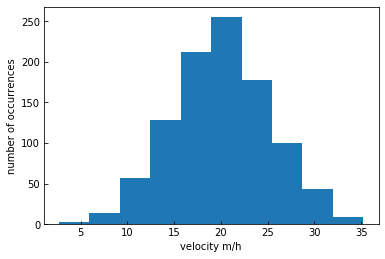

In [11]:
#simulate a velocity distribution as a gaussian veneterd on v with stdev 5
tmp  = 5. * np.random.randn(1000) + v
pl.hist(tmp)
pl.xlabel("velocity m/h")
pl.ylabel("number of occurrences");

In [12]:
def trip(d, v, l, t):
    """calculates the trip time based on travel speed and idle time at a street light
    Args: 
        d: travel distance in blocks
        v: average speed
        l: block length
        t: travel time to be updated
    """
    for b in range(d):
        #stockastic draw to hit a red light        
        toss = np.random.randint(0,2)
        
        t += np.abs(l / (0.2 * (np.random.randn() + v))) / 60.
        #print (b, t, toss)
        if toss:
            t += idle * np.random.rand()  
    return t

In [13]:
t = 0
print ("it takes", trip(d, v, l, t), "minutes to go 20 blocks")

it takes 16.2612603341 minutes to go 20 blocks


In [15]:
t = 0
def trip(d, v, l, t, vsigma = 5, plot=False):
    """calculates the trip time based on travel speed and idle time at a street light
    Args: 
        d: travel distance in blocks
        v: average speed
        l: block length
        t: travel time to be updated
        vsigma: (optional) standard deviation on velocity perturbation
        plot: (optional) whether to plot the trip. Default: False
    """
    if plot:
        ax, y = plot
    for b in range(d):
        #stockastic draw to hit a red light
        # the probability of hitting a red light is uniform (a coin toss)
        toss = np.random.randint(0,2)
        
        # the amount of time waiting  at the red light is stockastic following a 
        # uniform distribution between 0 and the duration of the street light
        if toss:
            t += idle * np.random.rand()
        
        # the velocity in each block will be the mean velocity perturbed by a gaussian
        vb = vsigma * np.random.randn() + v
        t += np.abs(l / vb) / 60.
           
        #plot with color corresponding to the velopccity
        if plot:
            alpha = min((vb - v + vsigma * 1.5) / (vsigma * 3), 1)
            alpha = max(alpha, 0)
            ax.plot([b, b + 1], [y, y], '-', color = pl.cm.coolwarm(alpha),
                   lw = 5)
    return t

trip duration in minutes 8.22


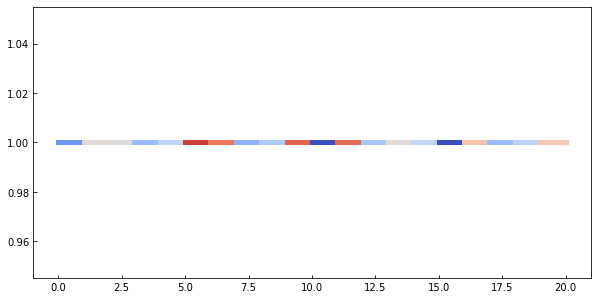

In [18]:
ax = pl.figure(figsize=(10,5)).add_subplot(111)
print ("trip duration in minutes %.2f"%trip(d, v, l, t, plot=(ax, 1)))

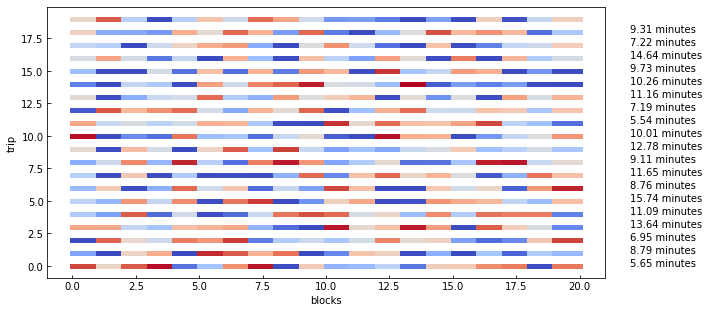

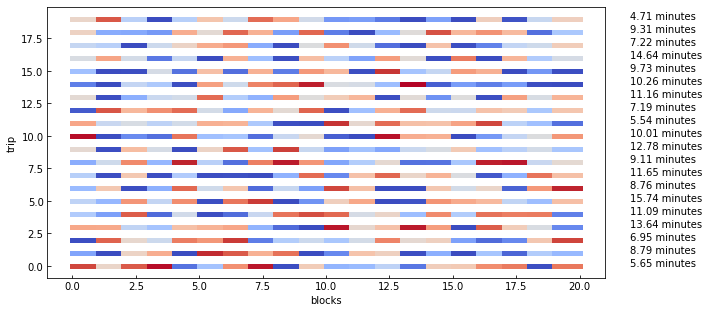

In [26]:
#simulate 20 trips

from IPython import display
ts = []
ax = pl.figure(figsize=(10,5)).add_subplot(111)

for n in range(20):
    ts.append(trip(d, v, l, t, plot=(ax, n)))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    pl.text(22, n, "%.2f minutes"%ts[-1])
    pl.xlabel("blocks")
    pl.ylabel("trip")    

Trip duration mean 9.70, standard deviation 2.96, 20 trips


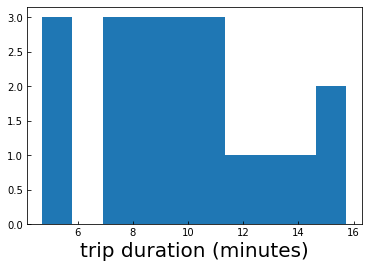

In [27]:
print ("Trip duration mean %.2f, standard deviation %.2f, 20 trips"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts)
pl.xlabel("trip duration (minutes)", fontsize=20);

Trip duration mean 9.84, standard deviation 3.32, 100 trips


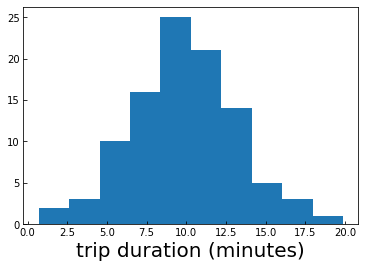

In [25]:
ts = []
for n in range(100):
    ts.append(trip(d, v, l, t))
print ("Trip duration mean %.2f, standard deviation %.2f, 100 trips"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts);
pl.xlabel("trip duration (minutes)", fontsize=20);

Trip duration mean 9.94, standard deviation 2.92, 1000 trips


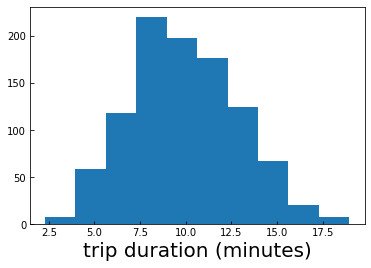

In [30]:
ts = []
for n in range(1000):
    ts.append(trip(d, v, l, t))
print ("Trip duration mean %.2f, standard deviation %.2f, 1000 trips"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts)
pl.xlabel("trip duration (minutes)", fontsize=20);

Trip duration mean 10.03, standard deviation 2.89, 10,000 trips


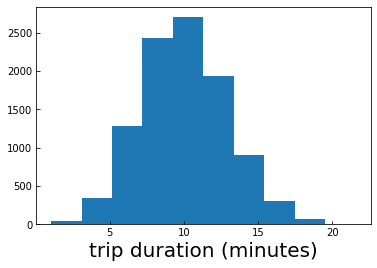

In [32]:
ts = []
for n in range(10000):
    ts.append(trip(d, v, l, t))
print ("Trip duration mean %.2f, standard deviation %.2f, 10,000 trips"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts);
pl.xlabel("trip duration (minutes)", fontsize=20);

 as the number of trips increase the distribution looks more andmore like a Gaussian